<a href="https://colab.research.google.com/github/Terabyte007/Assignments/blob/main/Ajadi_Afeez_Week_5_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd               # For data manipulation and analysis
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For data visualization
import matplotlib.cm as cm        # For colormaps in data visualization
from pandas.plotting import scatter_matrix  # For creating scatter plot matrices of DataFrames
import seaborn as sns  # For advanced statistical data visualization

In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the Excel file from your local system
uploaded = files.upload()  # Choose 'students_performance_records.xlsx' when prompted

# Step 2: Read the uploaded file into a DataFrame
df = pd.read_excel('students_performance_records.xlsx')

# Step 3: Display basic information
print("✅ Dataset loaded successfully!\n")
print("Shape of dataset:", df.shape)
print("\nPreview of data:")
df.head()

Saving students_performance_records.xlsx to students_performance_records.xlsx
✅ Dataset loaded successfully!

Shape of dataset: (2392, 15)

Preview of data:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Male,Caucasian,Some College,19.833723,7,1,2,0,0,YES,0,2.929196,2
1,1002,18,Female,Caucasian,High School,15.408756,0,0,1,0,0,No,0,3.042915,1
2,1003,15,Female,Asian,Bachelor's,4.210570,26,0,2,0,0,No,0,0.112602,4
3,1004,17,Male,Caucasian,Bachelor's,10.028829,14,0,3,1,0,No,0,2.054218,3
4,1005,17,Male,Caucasian,Some College,4.672495,17,1,3,0,0,No,0,1.288061,4


In [18]:
df.head(11)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,male,caucasian,some college,19.833723,7,1,2,0,0,yes,0,2.929196,2
1,1002,18,female,caucasian,high school,15.408756,0,0,1,0,0,no,0,3.042915,1
2,1003,15,female,asian,bachelor's,4.210570,26,0,2,0,0,no,0,0.112602,4
3,1004,17,male,caucasian,bachelor's,10.028829,14,0,3,1,0,no,0,2.054218,3
4,1005,17,male,caucasian,some college,4.672495,17,1,3,0,0,no,0,1.288061,4
5,1006,18,female,caucasian,high school,8.191219,0,0,1,1,0,no,0,3.084184,1
6,1007,15,female,african american,high school,15.601680,10,0,3,0,1,no,0,2.748237,2
7,1008,15,male,african american,bachelor's,15.424496,22,1,1,1,0,no,0,1.360143,4
8,1009,17,male,caucasian,bachelor's,4.562008,1,0,2,0,1,no,1,2.896819,2
9,1010,16,male,caucasian,high school,18.444466,0,0,3,1,0,no,0,3.573474,0


**Question 3**

In [19]:
# ==========================================
# 🧹 Check and Handle Missing or Inconsistent Data
# ==========================================

import pandas as pd
import numpy as np

# Step 1: Display dataset information
print("🔎 Dataset Overview:")
df.info()

# Step 2: Check for missing values
print("\n🕳 Missing Values Count:")
print(df.isna().sum())

# Step 3: Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\n🔁 Number of duplicated rows: {duplicates}")

# Remove duplicate rows if any
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"✅ Dropped {duplicates} duplicate rows.")
else:
    print("✅ No duplicate rows found.")

# Step 4: Handle missing values
# Fill numeric columns with mean, categorical columns with mode
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

print("\n✅ Missing values handled successfully!")

# Step 5: Check for inconsistent categorical entries
print("\n🔎 Unique values in categorical columns:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].unique())

# Step 6: Standardize categorical data (lowercase and trim spaces)
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.lower())
print("\n✨ Categorical data standardized (all lowercase, spaces removed).")

# Step 7: Fix specific inconsistent entries

# --- Fix inconsistent Gender entries ---
df['Gender'] = df['Gender'].replace({
    'fema': 'female',
    'femal': 'female',
    'female ': 'female',
    'malemale': 'male',
    'male ': 'male',
    'm': 'male',
    'f': 'female'
})

# --- Fix inconsistent ParentalEducation entries ---
df['ParentalEducation'] = df['ParentalEducation'].replace({
    'highest h': 'high school',
    'higher': "bachelor's",
    'bachelors': "bachelor's"
})


# Step 8: Recheck cleaned unique values
print("\n✅ Cleaned unique values:")

print("\nGender:")
print(df['Gender'].unique())

print("\nParentalEducation:")
print(df['ParentalEducation'].unique())

# Step 9: Recheck missing values after all cleaning
print("\n🔁 Missing Values After Cleaning:")
print(df.isna().sum())

# Step 10: Preview cleaned dataset
df.head(11)

🔎 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2392 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   object 
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 280

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,male,caucasian,some college,19.833723,7,1,2,0,0,yes,0,2.929196,2
1,1002,18,female,caucasian,high school,15.408756,0,0,1,0,0,no,0,3.042915,1
2,1003,15,female,asian,bachelor's,4.210570,26,0,2,0,0,no,0,0.112602,4
3,1004,17,male,caucasian,bachelor's,10.028829,14,0,3,1,0,no,0,2.054218,3
4,1005,17,male,caucasian,some college,4.672495,17,1,3,0,0,no,0,1.288061,4
5,1006,18,female,caucasian,high school,8.191219,0,0,1,1,0,no,0,3.084184,1
6,1007,15,female,african american,high school,15.601680,10,0,3,0,1,no,0,2.748237,2
7,1008,15,male,african american,bachelor's,15.424496,22,1,1,1,0,no,0,1.360143,4
8,1009,17,male,caucasian,bachelor's,4.562008,1,0,2,0,1,no,1,2.896819,2
9,1010,16,male,caucasian,high school,18.444466,0,0,3,1,0,no,0,3.573474,0


In [20]:
print("🧾 Column names:")
print(df.columns.tolist())

🧾 Column names:
['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']


In [23]:
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].unique())



Gender:
['male' 'female']

Ethnicity:
['caucasian' 'asian' 'african american' 'other']

ParentalEducation:
['some college' 'high school' "bachelor's"]

Music:
['yes' 'no']


**Bar Chart of Average GPA by Grade Class:**

**Group the data by GradeClass and calculate the average GPA for each grade class.**

In [54]:
# 📊 Group by GradeClass and calculate average GPA
avg_gpa_by_grade = df.groupby('GradeClass')['GPA'].mean().sort_index()

# Convert Series to DataFrame with headers
avg_gpa_by_grade = avg_gpa_by_grade.reset_index()
avg_gpa_by_grade.columns = ['GradeClass', 'GPA']

# Display the result
print("🎓 Average GPA by Grade Class:")
print(avg_gpa_by_grade)

🎓 Average GPA by Grade Class:
   GradeClass       GPA
0           0  3.102942
1           1  3.001673
2           2  2.659742
3           3  2.215545
4           4  1.208041


**Create a bar chart displaying the average GPA for each grade class.**

**Use a colormap to color the bars based on the GPA values. Choose a color map that reflects the gradient from low to high GPA.**

**Add annotations to display the exact GPA values on top of the bars.**

**Make sure the chart has an appropriate title, and labels for the x and y axes.**

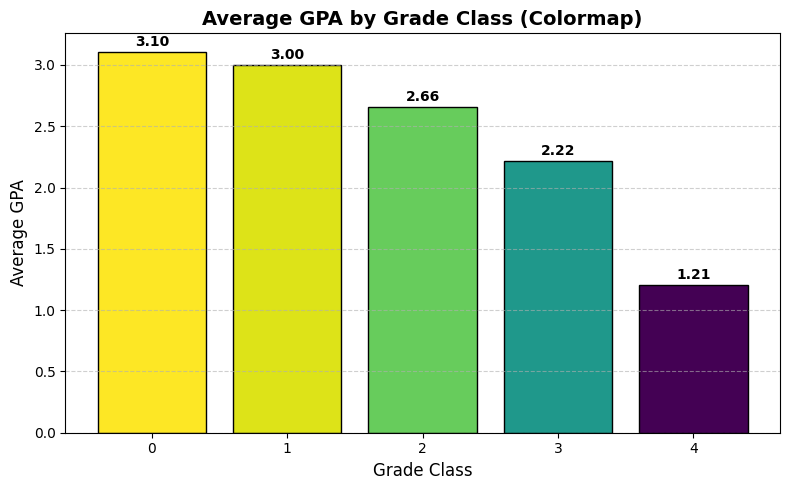

In [57]:
# Normalize GPA values for colormap
norm = plt.Normalize(avg_gpa_by_grade.min(), avg_gpa_by_grade.max())
colors = cm.viridis(norm(avg_gpa_by_grade.values))

# Plot the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_gpa_by_grade.index, avg_gpa_by_grade.values, color=colors, edgecolor='black')

# Add labels and title
plt.title('Average GPA by Grade Class (Colormap)', fontsize=14, fontweight='bold')
plt.xlabel('Grade Class', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add GPA annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f"{height:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Scatter Matrix for Study Time, Absences, and GPA:**

**Create a scatter matrix for the variables StudyTimeWeekly, Absences, and GPA. bold text**

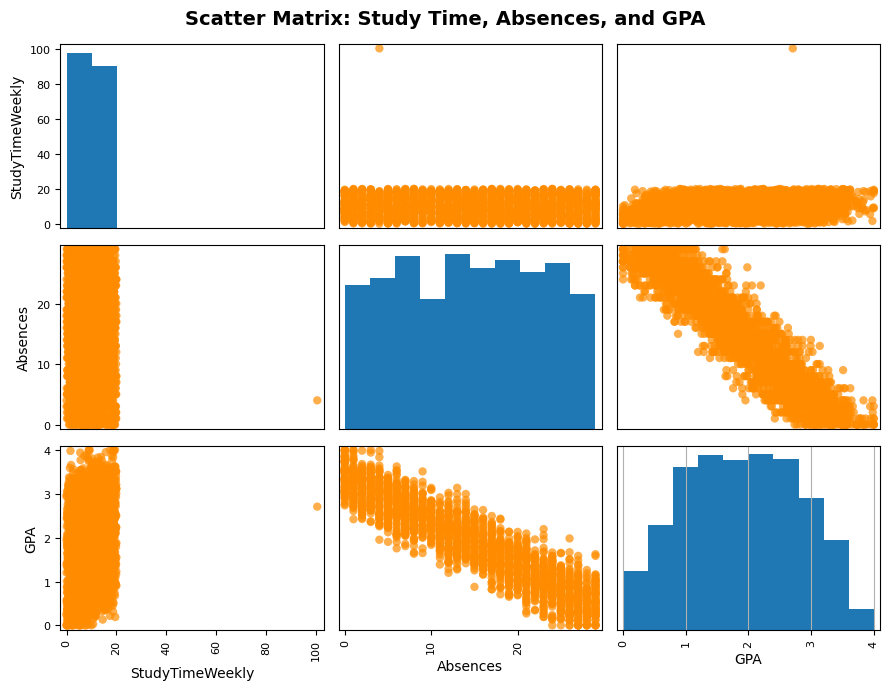

In [61]:
# Select relevant columns
scatter_data = df[['StudyTimeWeekly', 'Absences', 'GPA']]

# Create scatter matrix with histograms on the diagonal
scatter_matrix(
    scatter_data,
    figsize=(9, 7),
    diagonal='hist',
    marker='o',
    alpha=0.7,
    color='darkorange'  # standout color
)

# Add title and grid
plt.suptitle('Scatter Matrix: Study Time, Absences, and GPA', fontsize=14, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

**Box Plot for Study Time Distribution by Grade Class:**

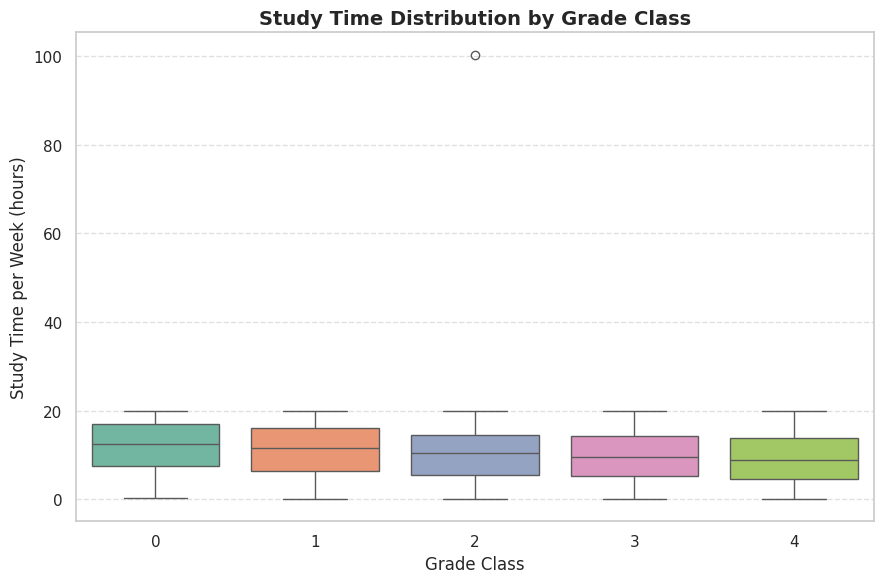

In [63]:
# Set plot style
sns.set(style="whitegrid")

# Create the box plot with hue set to GradeClass and legend disabled
plt.figure(figsize=(9, 6))
sns.boxplot(
    data=df,
    x='GradeClass',
    y='StudyTimeWeekly',
    hue='GradeClass',        # Assign hue to match x
    palette='Set2',
    dodge=False,             # Prevent side-by-side boxes
    legend=False             # Suppress duplicate legend
)

# Add title and axis labels
plt.title('Study Time Distribution by Grade Class', fontsize=14, fontweight='bold')
plt.xlabel('Grade Class', fontsize=12)
plt.ylabel('Study Time per Week (hours)', fontsize=12)

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()